In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from evaluation import visualize_results
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import HistGradientBoostingRegressor
import warnings
from sklearn.exceptions import FitFailedWarning
import numpy as np
import matplotlib.pyplot as plt

# Tắt tất cả các cảnh báo từ sklearn và các cảnh báo khác
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## 1. Kháo bái các hàm xử lý 

In [2]:
import os
from settings import BASE_DIR
from data import processing_data
# Loading our dataset

data_path = os.path.join(BASE_DIR, "dataset", "train.csv")
df = pd.read_csv(data_path)
df.head()

,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,log_budget,log_no_of_votes,log_gross,log_gross_bin
0,"Period Drama, Biography, Drama, History, Music...",7.2,556,64.812903,2025.0,11625735.0,26000000.0,Russia,17.073607,6.322565,16.268732,2
1,"Caper, Film Noir, Action, Crime, Drama",8.1,37000,89.000000,1949.0,5534.0,1300000.0,United States,14.077876,10.518700,8.618847,0
2,"Classical Western, Drama, Romance, Western",7.7,27000,64.812903,1946.0,15293.0,2000000.0,United States,14.508658,10.203629,9.635216,0
3,"Dark Comedy, Comedy, Drama, Sport",6.8,92000,64.000000,2012.0,6985158.0,12000000.0,"United States, Canada",16.300417,11.429555,15.759298,1
4,"Coming-of-Age, Psychological Horror, Drama, Ho...",5.8,34000,86.000000,2024.0,5396508.0,26000000.0,"United States, United Kingdom",17.073607,10.434145,15.501263,1


In [3]:
def train_best_hgb_model(X_train, y_train, cv=5, scoring='neg_mean_absolute_error'):
    """
    Huấn luyện GradientBoostingRegressor với GridSearchCV và trả về mô hình tốt nhất.
    
    Parameters:
        X_train (ndarray): Dữ liệu huấn luyện đầu vào (đã chuẩn hóa).
        y_train (ndarray): Nhãn huấn luyện.
        cv (int): Số lượng folds dùng trong cross-validation.
        scoring (str): Chiến lược đánh giá. Mặc định là RMSE âm (để chọn RMSE nhỏ nhất).
    
    Returns:
        best_model (GradientBoostingRegressor): Mô hình tốt nhất sau khi tìm kiếm.
        best_params (dict): Bộ tham số tốt nhất.
    """

    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_iter': [200, 300],
        'max_depth': [3, 5, None],
        'l2_regularization': [0.0, 1.0],
    }

    hgb = HistGradientBoostingRegressor(
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=5,
        random_state=42
    )

    grid_search = GridSearchCV(
        hgb, param_grid, cv=cv,
        scoring=scoring, n_jobs=-1, verbose=0
    )

    grid_search.fit(X_train, y_train)

    print(f"✅ Best parameters found: {grid_search.best_params_}")

    return grid_search.best_estimator_, grid_search.best_params_

## 2. Train model


🔁 Fold 1
✅ Scaler saved to: d:\Thanh\TLHT\HK6\KHDL\movie-analyst\best_models\GB_model\fold_1\scaler.pkl
✅ Best parameters found: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': None, 'max_iter': 200}
🔍 Best params for fold 1: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': None, 'max_iter': 200}
✅ Early stopped at iteration: 31
📉 Validation loss at best iteration: -1.0475
Overall Metrics (Train):
  R2: 0.6737
  MAE: 53983455.1725
  MAPE: 296.71%
Overall Metrics (Validation):
  R2: 0.6311
  MAE: 59851404.1446
  MAPE: 5312.94%


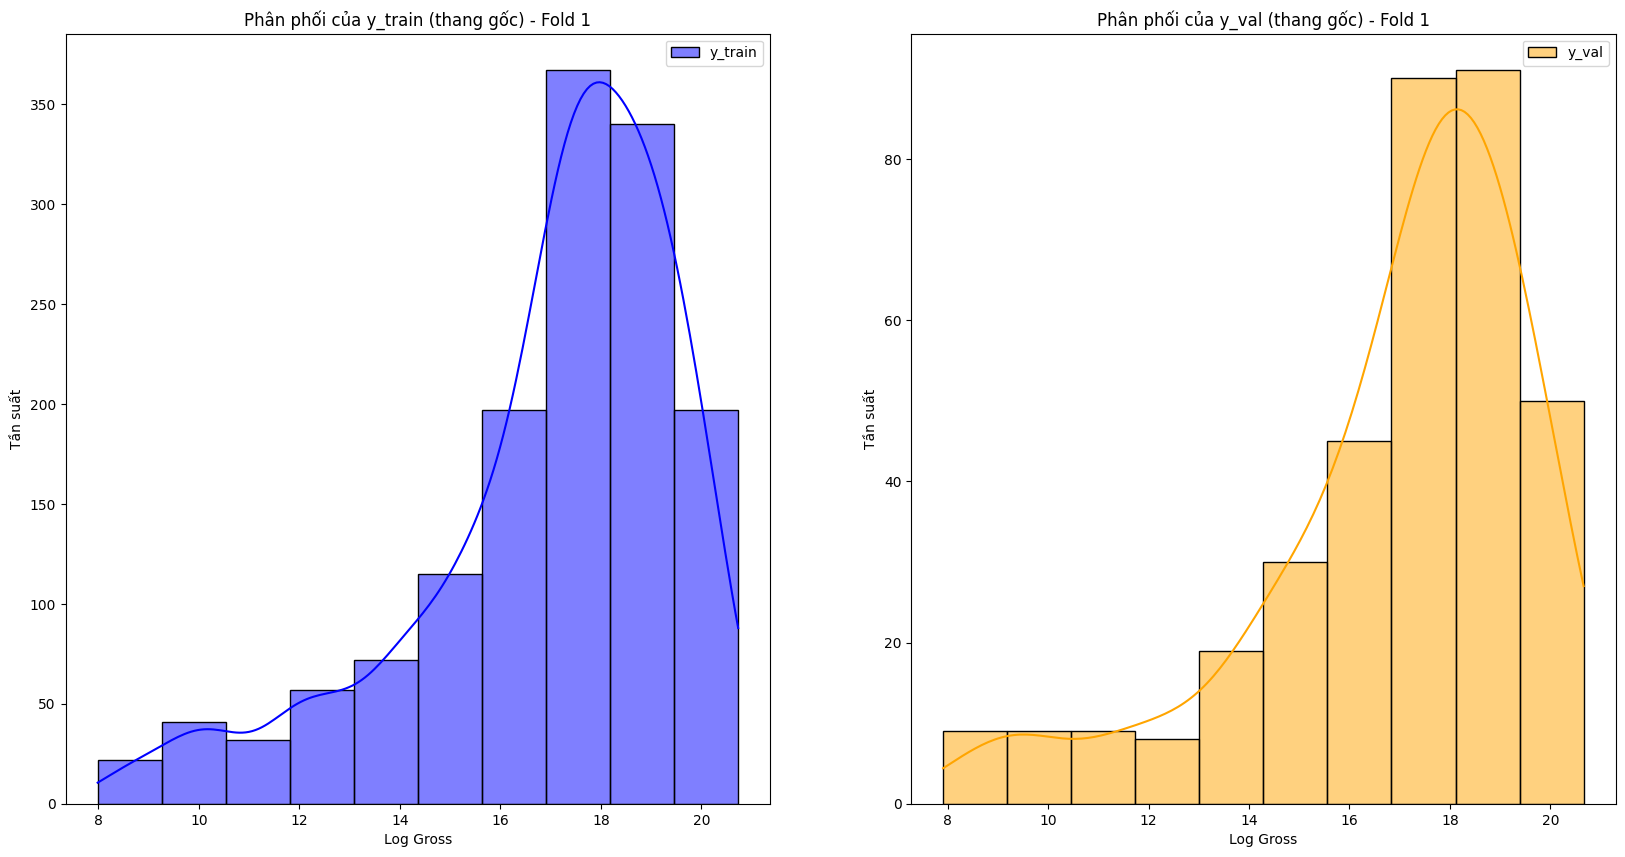

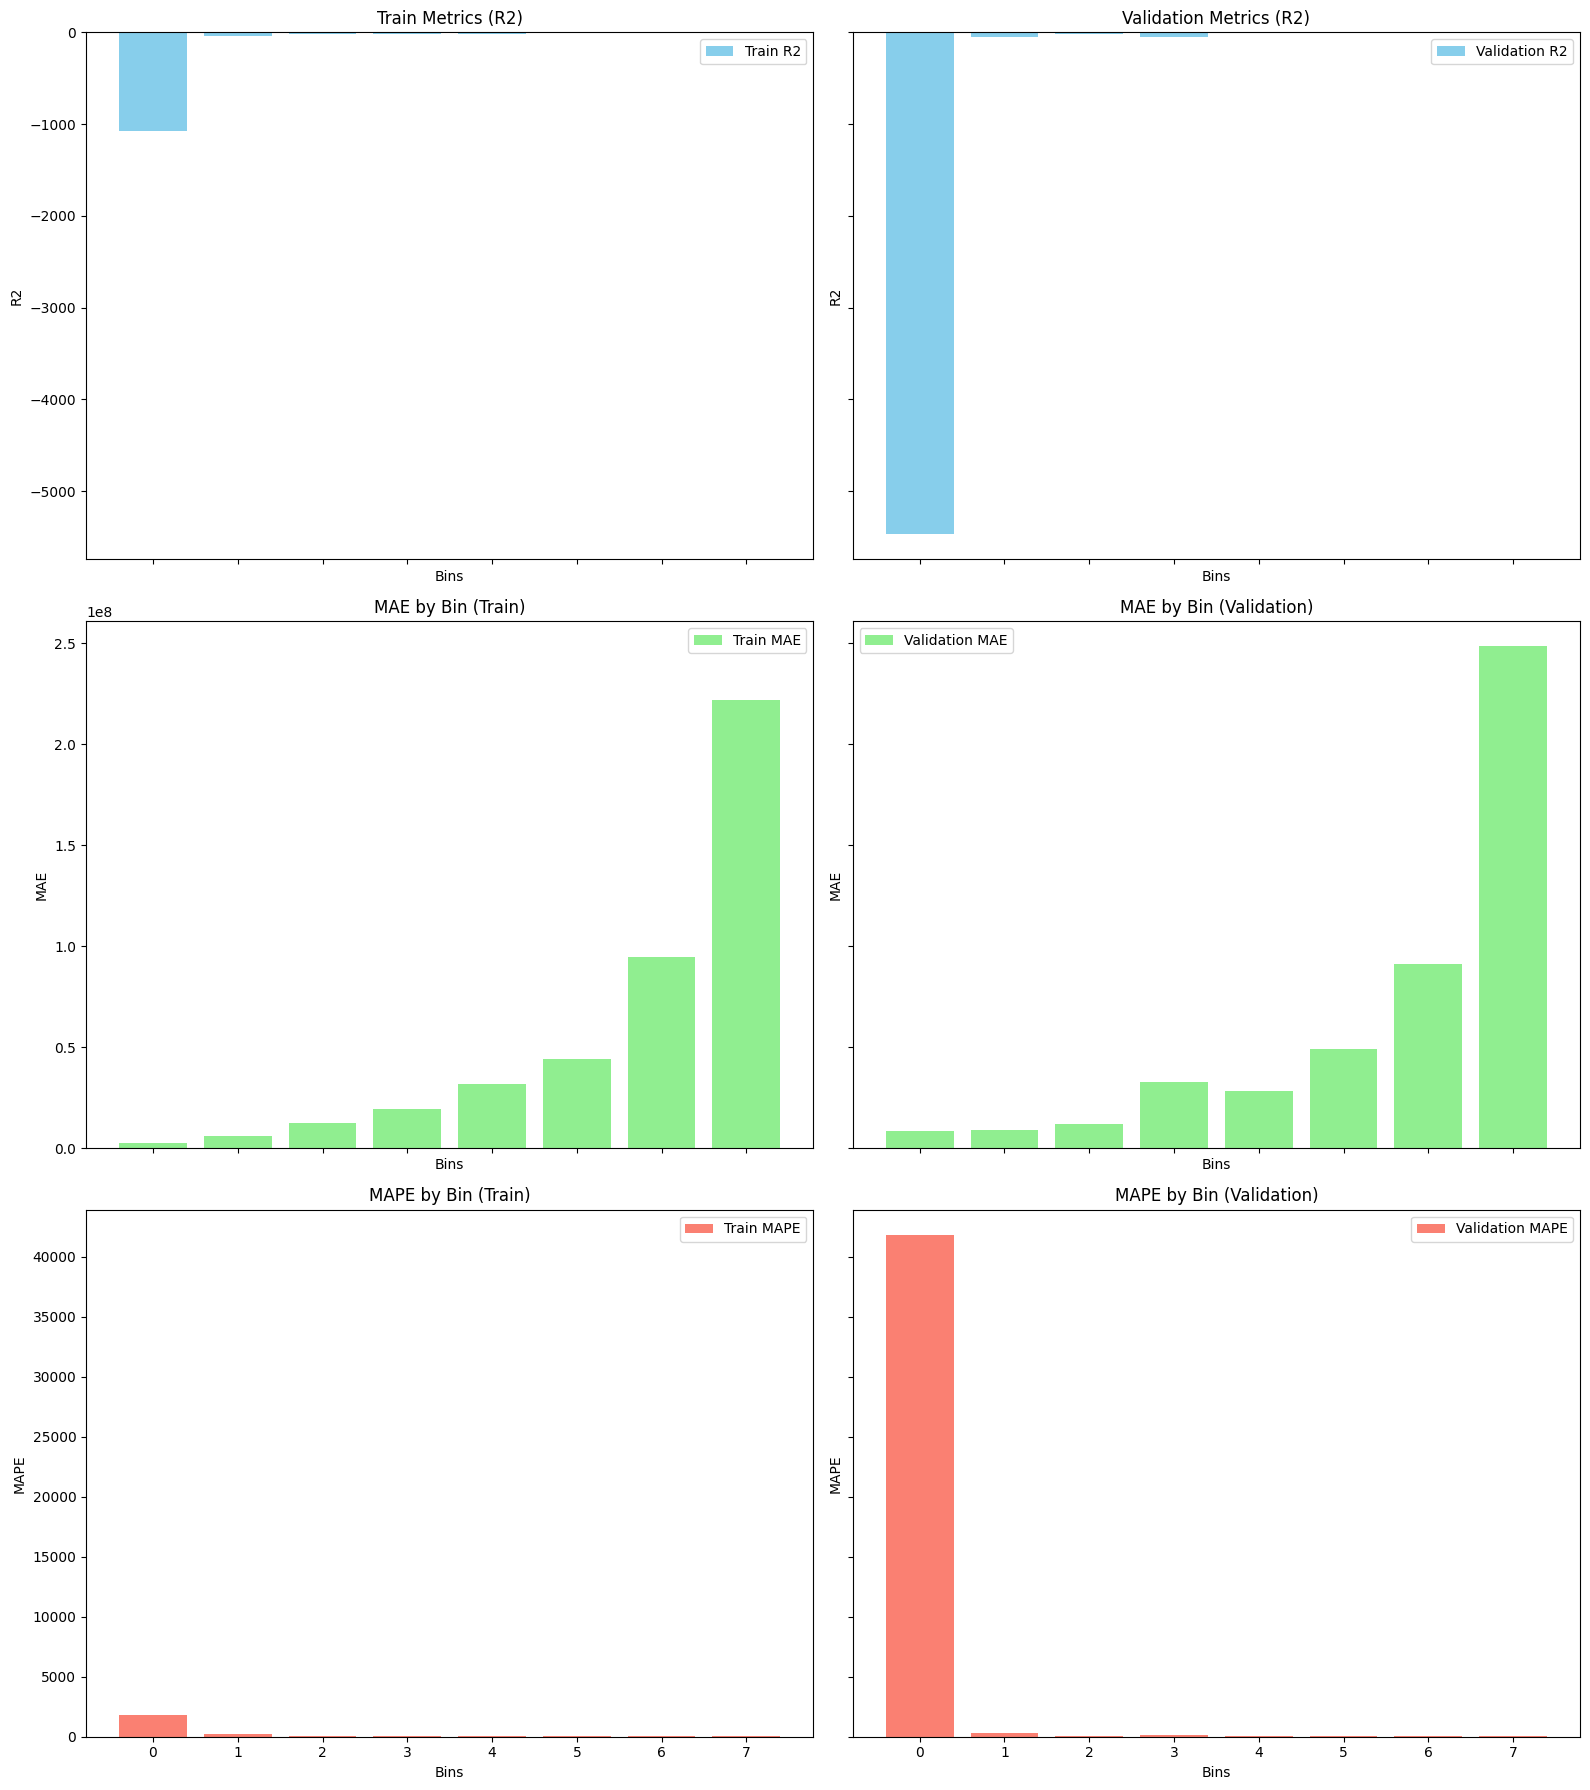

   Bin           R2           MAE          MAPE  Count
0    0 -5469.262263  8.656503e+06  41813.692468     45
1    1   -51.390469  8.730322e+06    310.185317     45
2    2   -15.579687  1.204095e+07     89.427195     45
3    3   -48.512187  3.269104e+07    107.247311     45
4    4   -11.349917  2.847381e+07     48.959409     45
5    5    -7.951194  4.881344e+07     46.374562     45
6    6    -8.143911  9.091433e+07     42.789479     45
7    7    -1.184816  2.484908e+08     44.872262     45
   Bin           R2           MAE          MAPE  Count
0    0 -5469.262263  8.656503e+06  41813.692468     45
1    1   -51.390469  8.730322e+06    310.185317     45
2    2   -15.579687  1.204095e+07     89.427195     45
3    3   -48.512187  3.269104e+07    107.247311     45
4    4   -11.349917  2.847381e+07     48.959409     45
5    5    -7.951194  4.881344e+07     46.374562     45
6    6    -8.143911  9.091433e+07     42.789479     45
7    7    -1.184816  2.484908e+08     44.872262     45
✅ Model fo

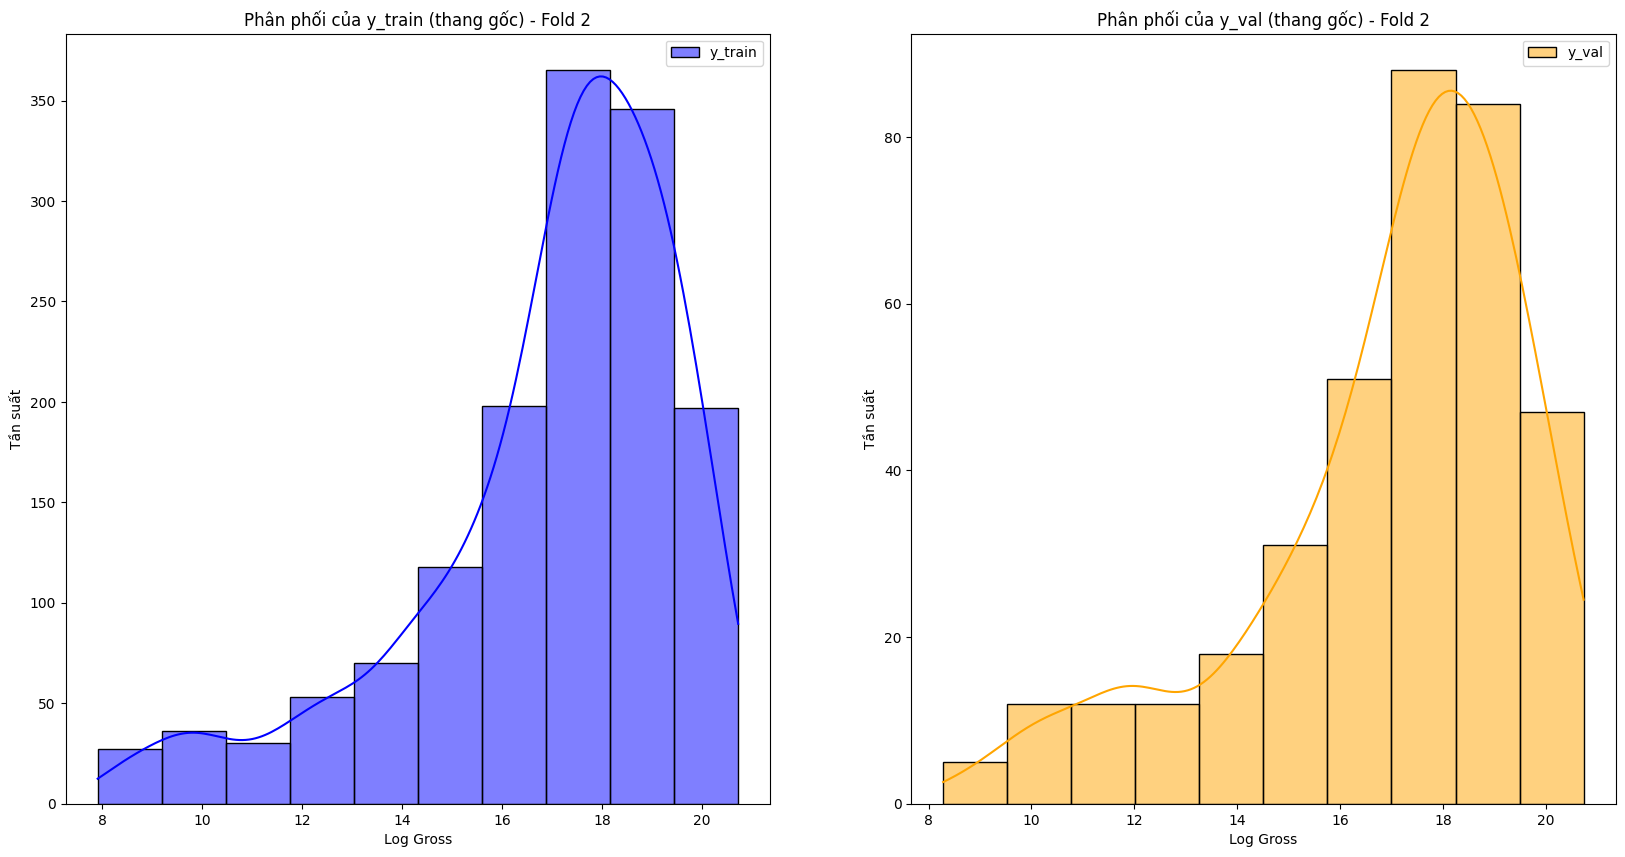

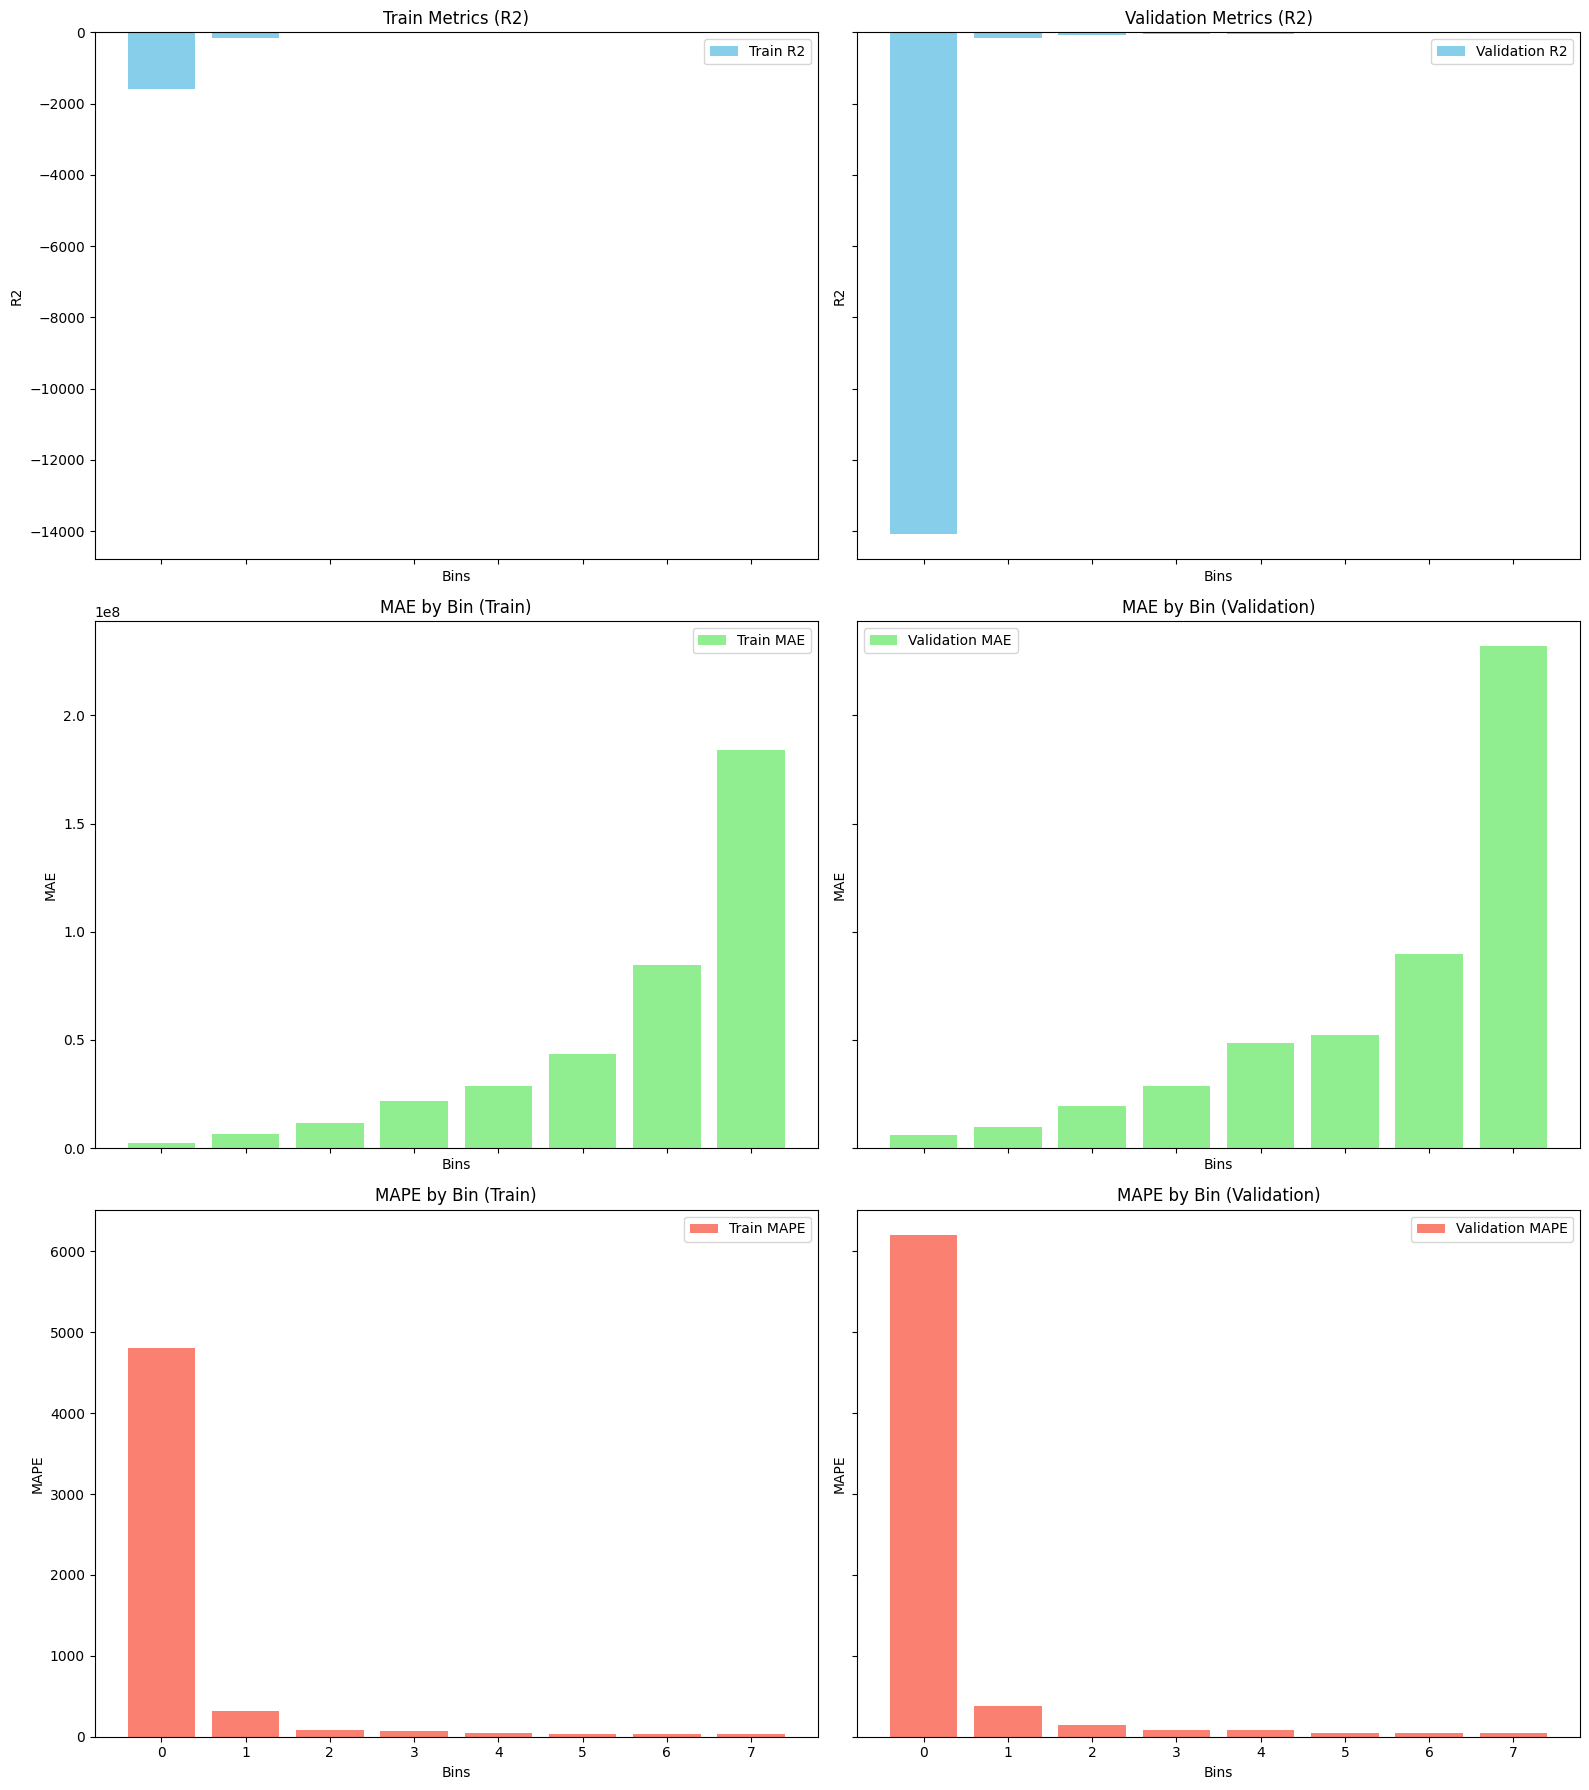

   Bin            R2           MAE         MAPE  Count
0    0 -14089.835295  6.202504e+06  6204.256367     45
1    1   -168.202313  9.565587e+06   379.656544     45
2    2    -76.767758  1.933550e+07   144.539275     45
3    3    -36.677010  2.859618e+07    85.857567     45
4    4    -40.274357  4.840533e+07    84.274274     45
5    5     -6.490100  5.242619e+07    47.414945     45
6    6     -5.382586  8.960846e+07    44.194178     45
7    7     -0.786111  2.320274e+08    41.486250     45
   Bin            R2           MAE         MAPE  Count
0    0 -14089.835295  6.202504e+06  6204.256367     45
1    1   -168.202313  9.565587e+06   379.656544     45
2    2    -76.767758  1.933550e+07   144.539275     45
3    3    -36.677010  2.859618e+07    85.857567     45
4    4    -40.274357  4.840533e+07    84.274274     45
5    5     -6.490100  5.242619e+07    47.414945     45
6    6     -5.382586  8.960846e+07    44.194178     45
7    7     -0.786111  2.320274e+08    41.486250     45
✅ Model fo

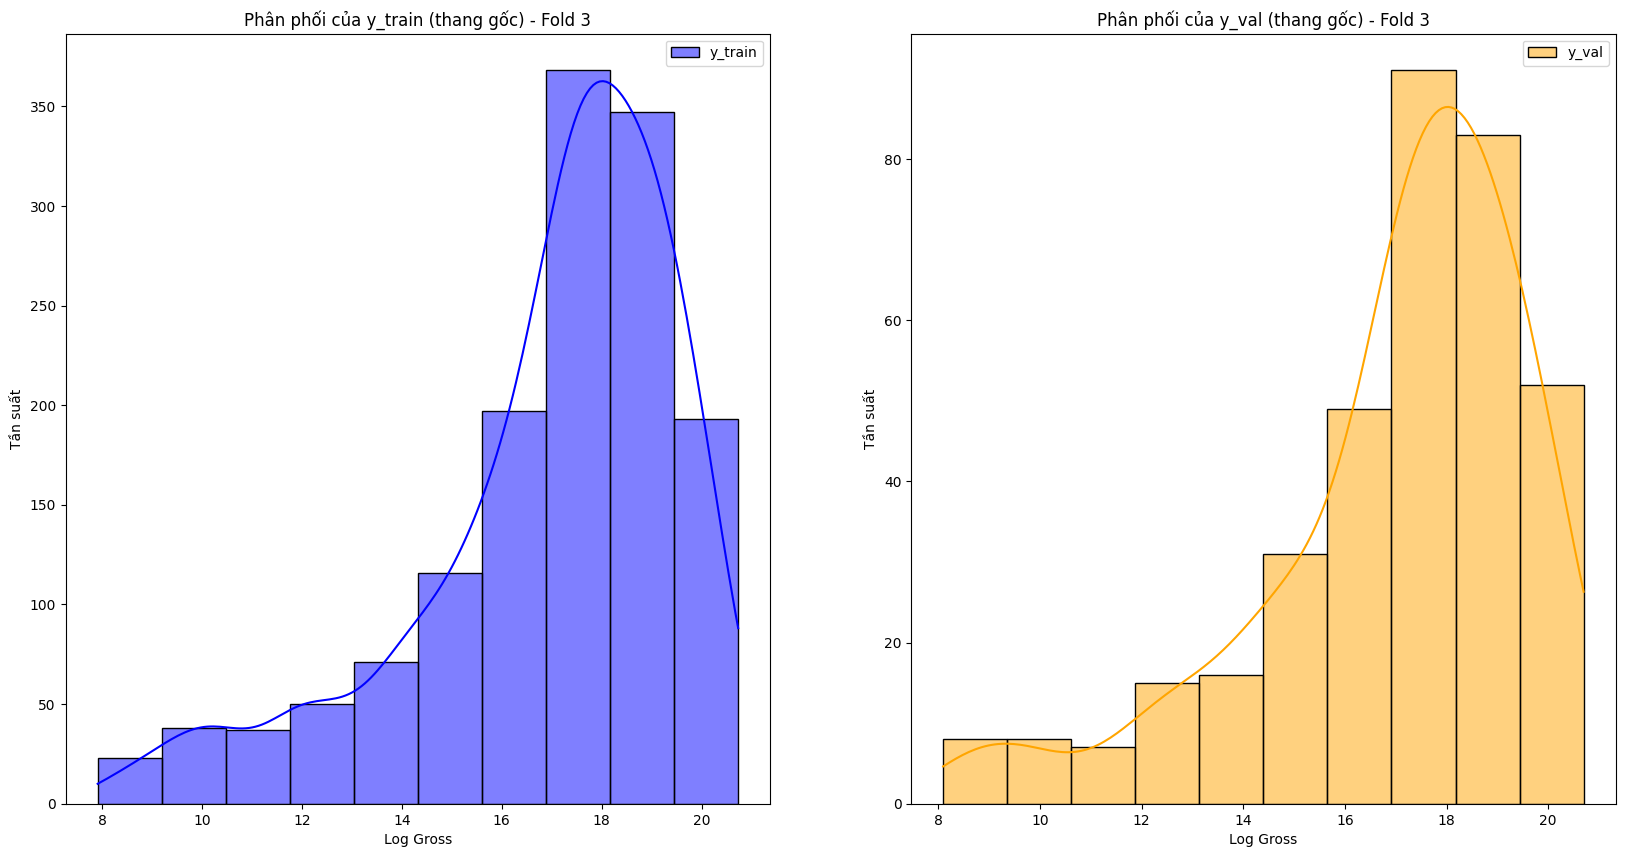

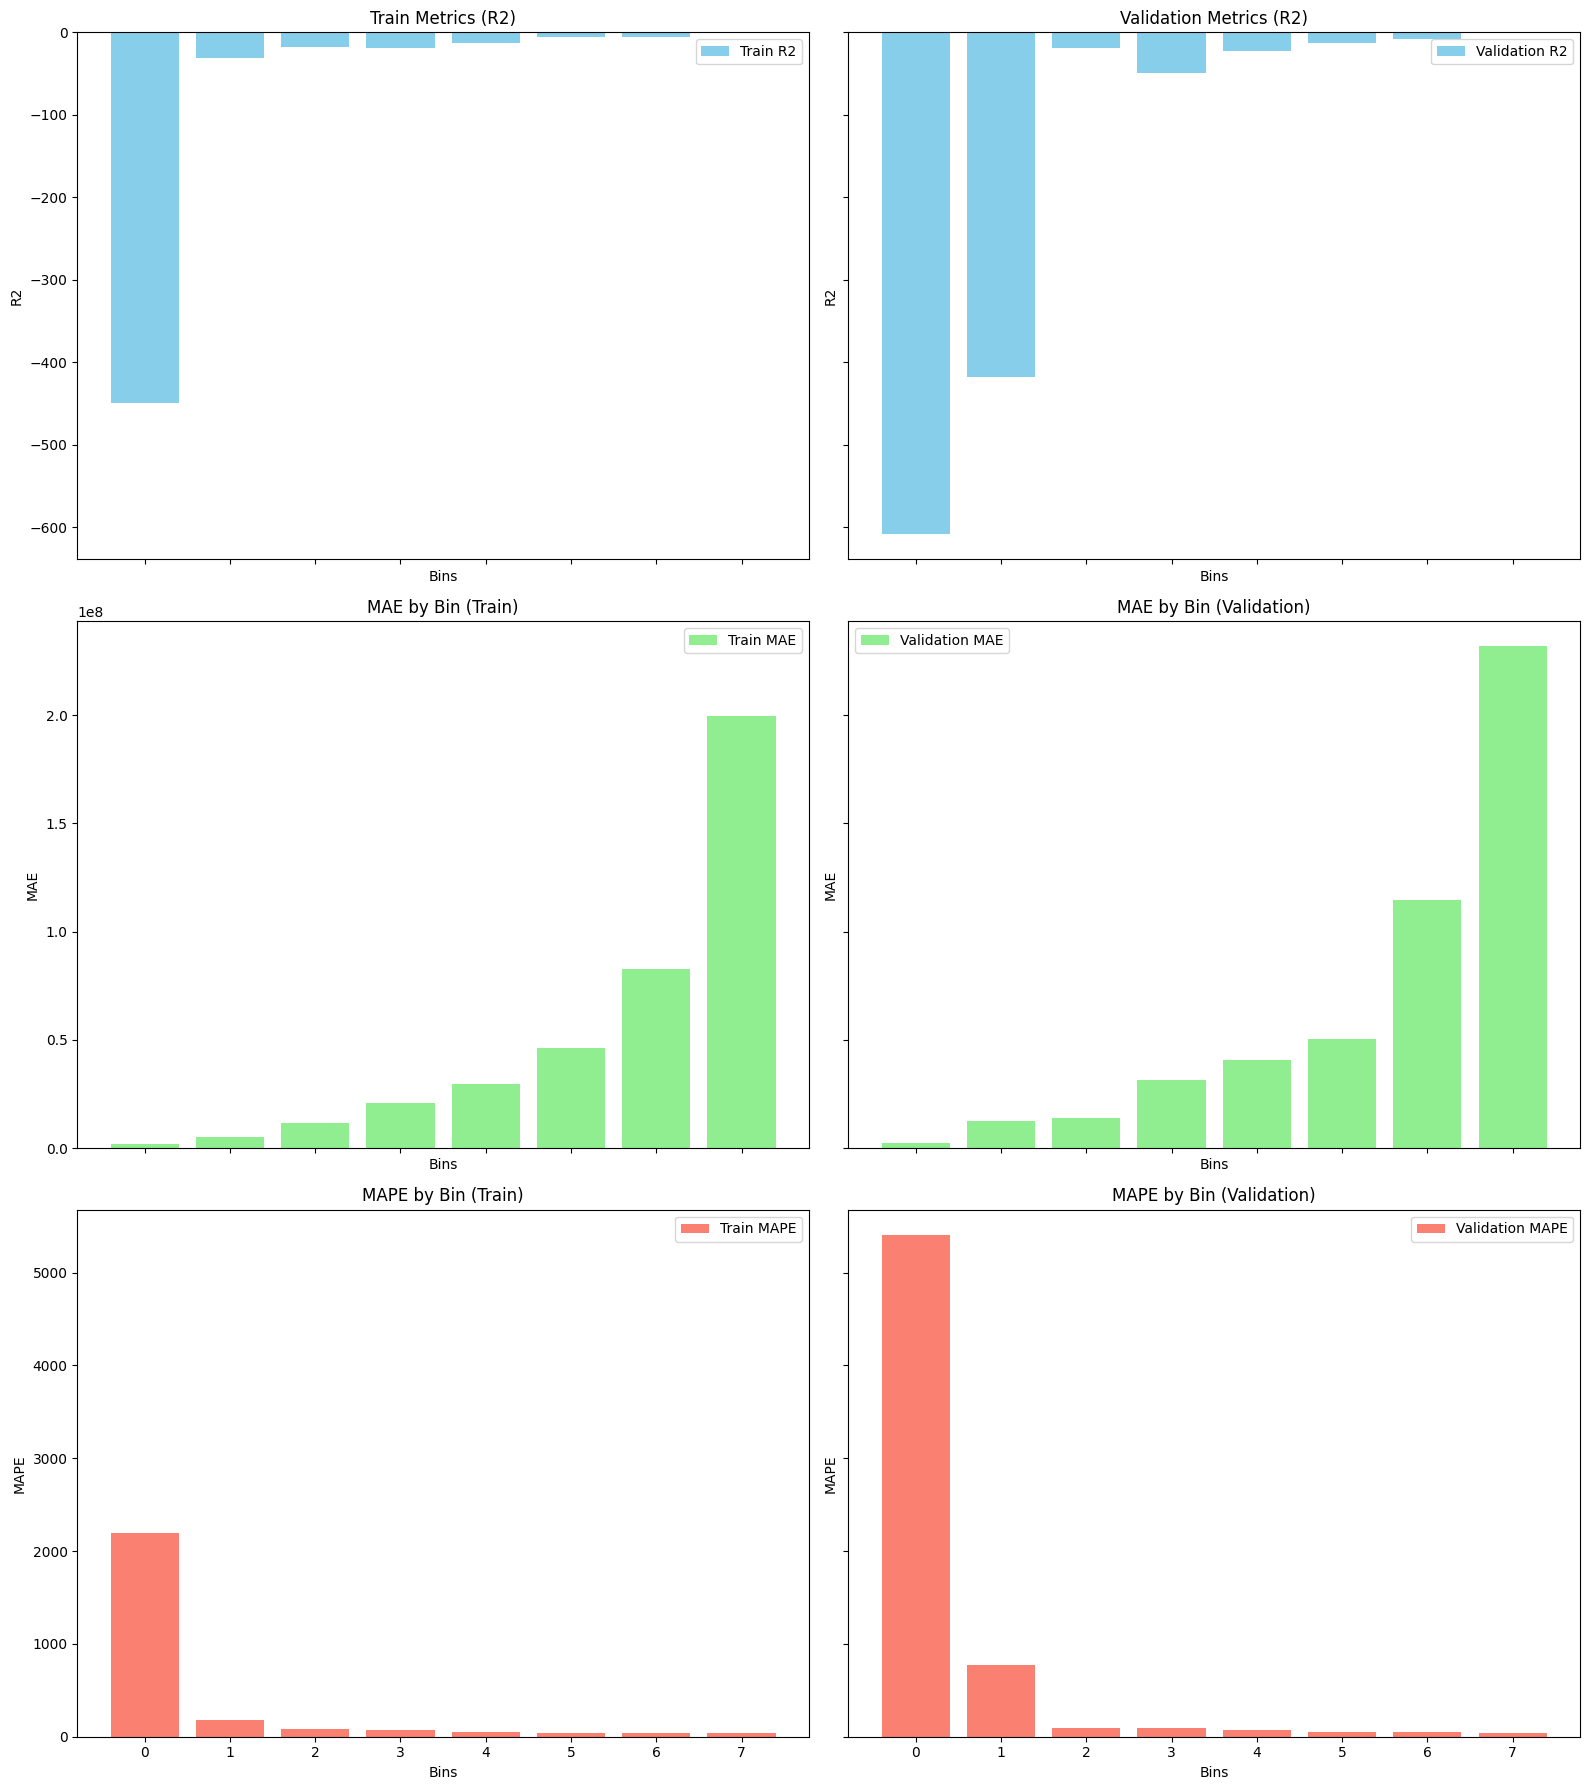

   Bin          R2           MAE         MAPE  Count
0    0 -608.465178  2.441923e+06  5407.446113     45
1    1 -417.372100  1.233843e+07   776.125659     45
2    2  -18.746045  1.406747e+07    94.638916     45
3    3  -49.478586  3.146713e+07    98.334496     45
4    4  -22.812091  4.089599e+07    69.303055     45
5    5  -12.918473  5.048689e+07    46.013039     45
6    6   -8.183557  1.146267e+08    51.088745     45
7    7   -1.072249  2.319358e+08    40.266983     45
   Bin          R2           MAE         MAPE  Count
0    0 -608.465178  2.441923e+06  5407.446113     45
1    1 -417.372100  1.233843e+07   776.125659     45
2    2  -18.746045  1.406747e+07    94.638916     45
3    3  -49.478586  3.146713e+07    98.334496     45
4    4  -22.812091  4.089599e+07    69.303055     45
5    5  -12.918473  5.048689e+07    46.013039     45
6    6   -8.183557  1.146267e+08    51.088745     45
7    7   -1.072249  2.319358e+08    40.266983     45
✅ Model for fold 3 saved to: best_models/GB_mo

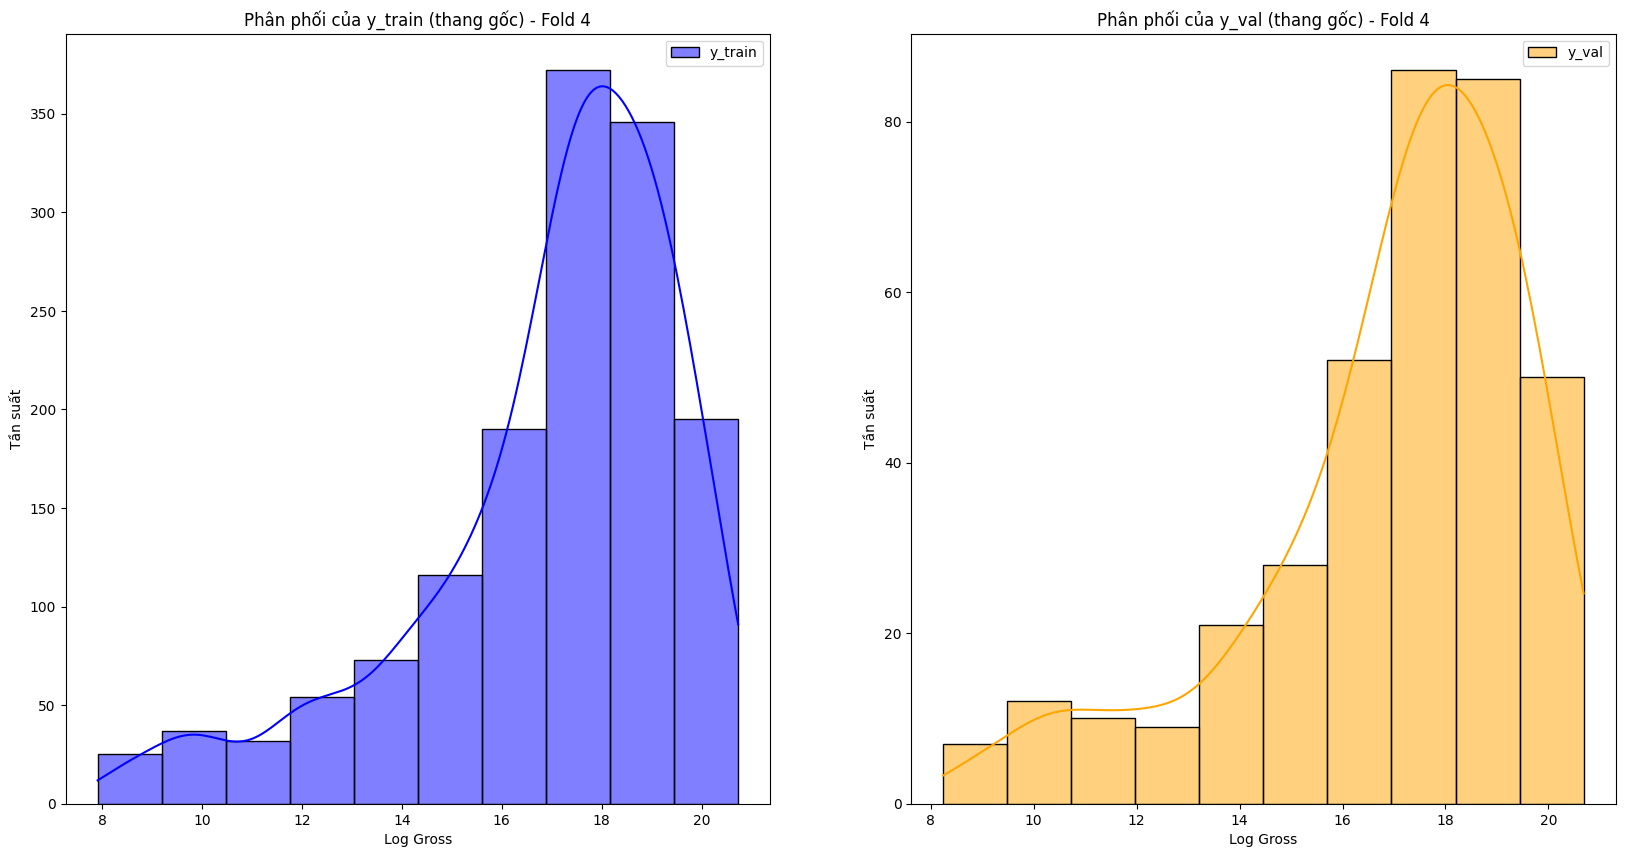

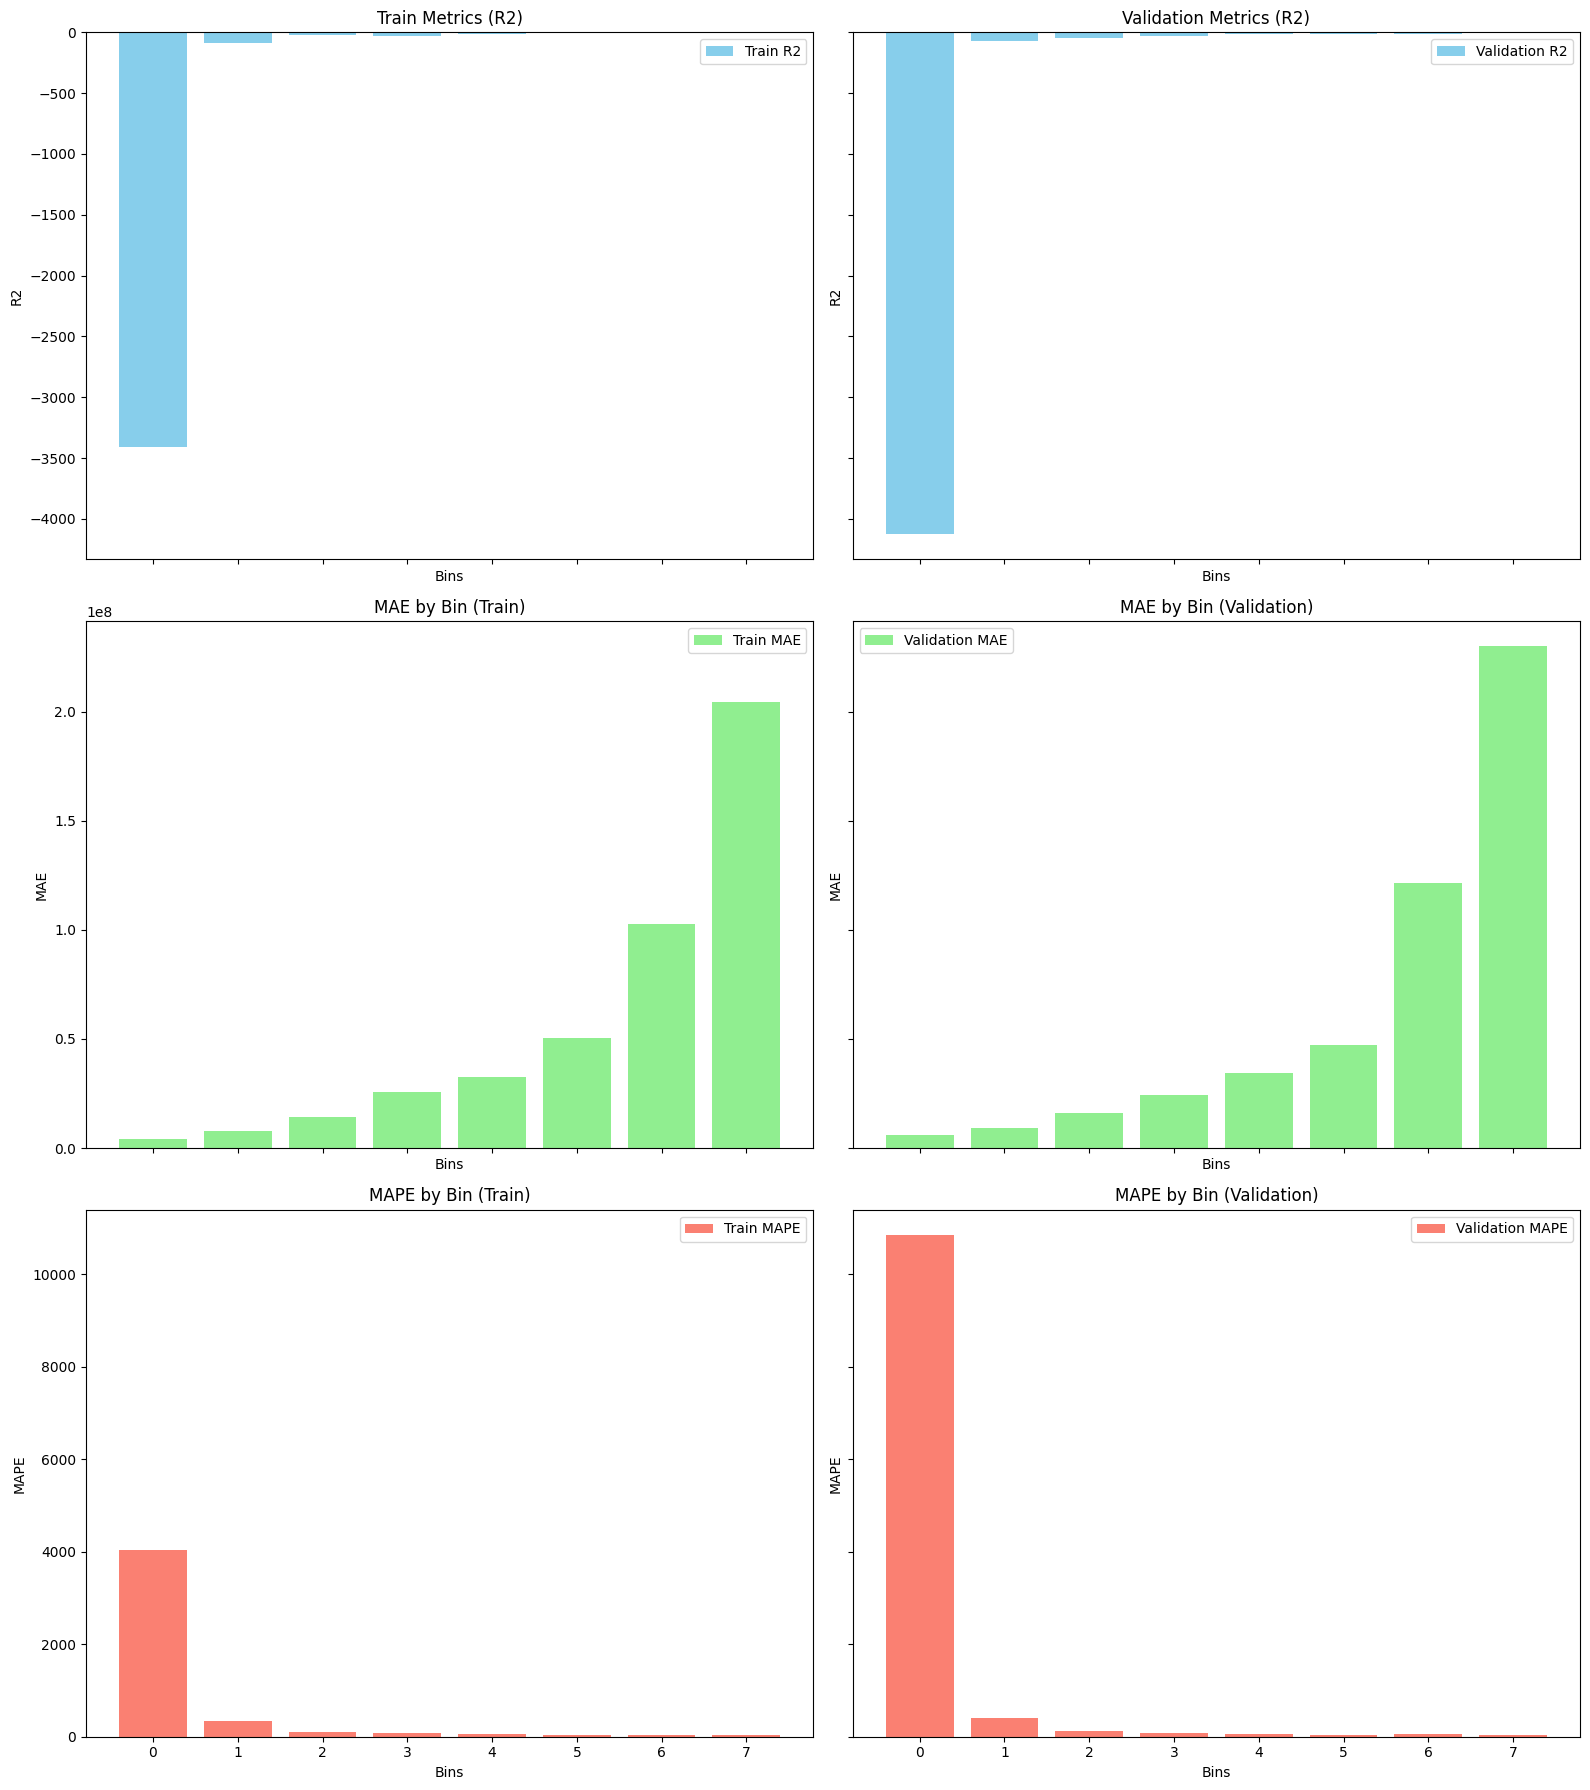

   Bin           R2           MAE          MAPE  Count
0    0 -4125.637280  5.859352e+06  10857.627390     45
1    1   -74.542559  9.328576e+06    401.257510     45
2    2   -48.258932  1.622159e+07    119.267863     45
3    3   -31.371834  2.433342e+07     80.795853     45
4    4   -16.882108  3.454620e+07     61.486605     45
5    5    -9.718010  4.728856e+07     44.319437     45
6    6   -11.221591  1.214110e+08     54.963356     45
7    7    -1.193701  2.299571e+08     48.006792     45
   Bin           R2           MAE          MAPE  Count
0    0 -4125.637280  5.859352e+06  10857.627390     45
1    1   -74.542559  9.328576e+06    401.257510     45
2    2   -48.258932  1.622159e+07    119.267863     45
3    3   -31.371834  2.433342e+07     80.795853     45
4    4   -16.882108  3.454620e+07     61.486605     45
5    5    -9.718010  4.728856e+07     44.319437     45
6    6   -11.221591  1.214110e+08     54.963356     45
7    7    -1.193701  2.299571e+08     48.006792     45
✅ Model fo

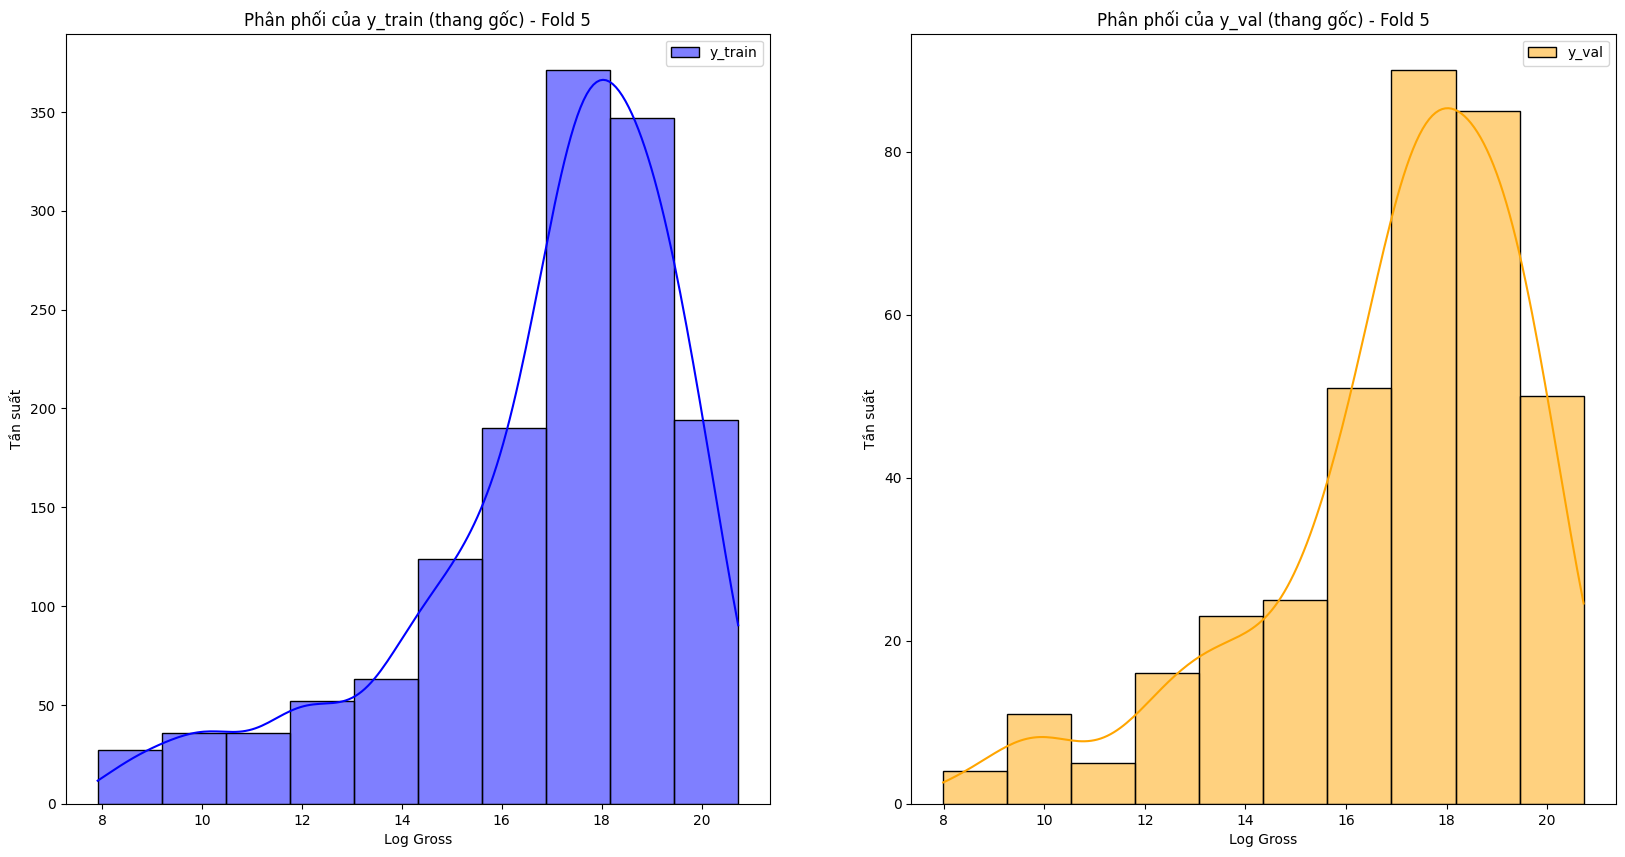

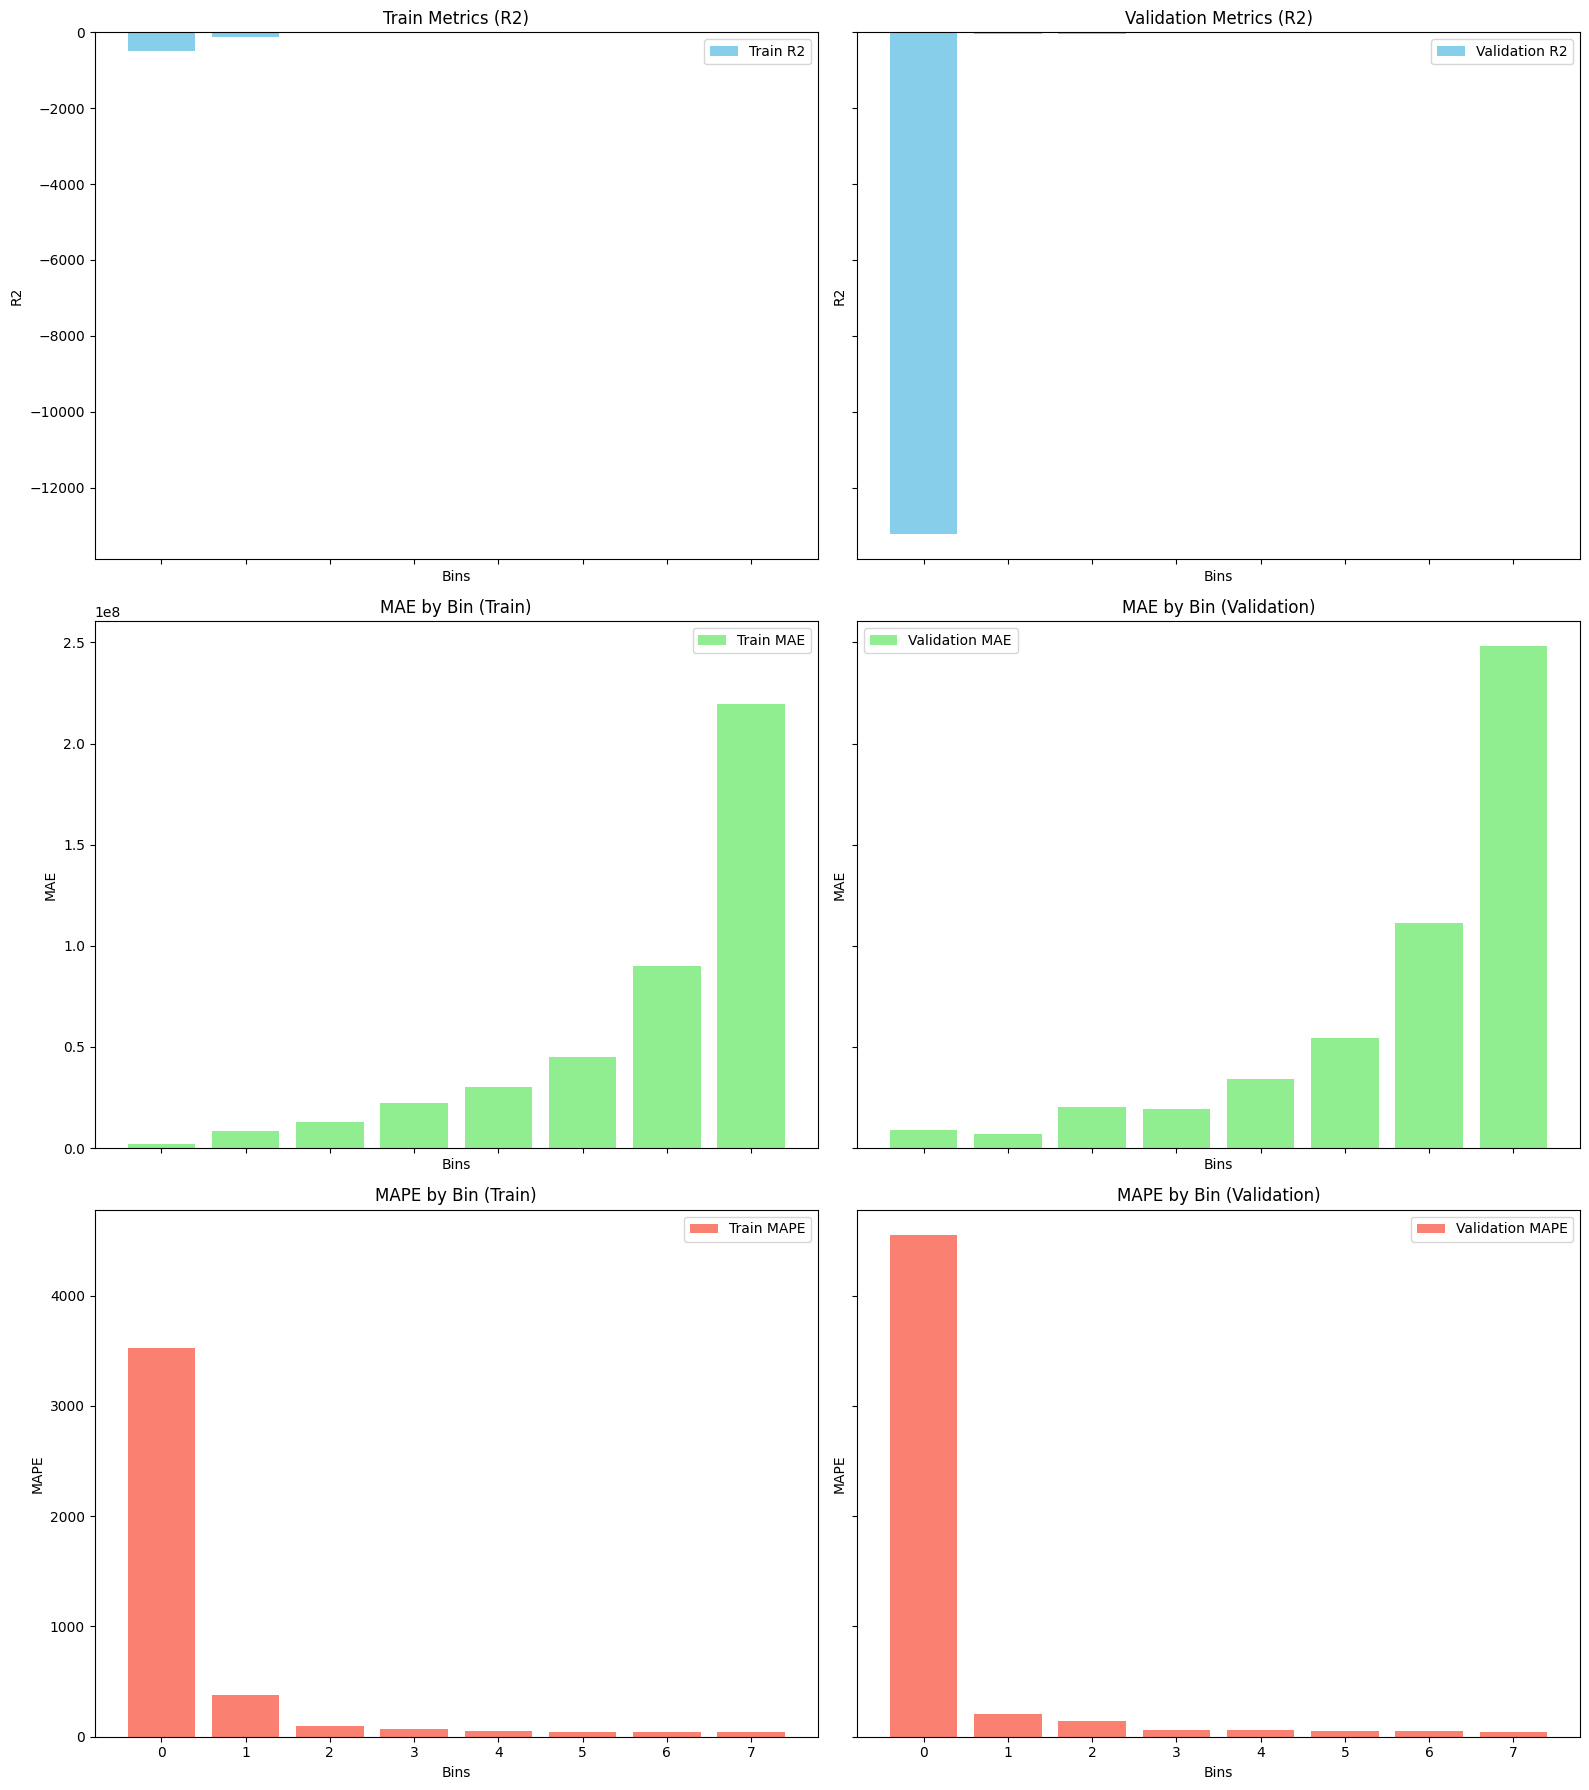

   Bin            R2           MAE         MAPE  Count
0    0 -13229.947516  8.781966e+06  4551.025922     45
1    1    -46.138571  6.912552e+06   202.481244     45
2    2    -41.968559  2.026195e+07   141.312208     45
3    3    -19.321724  1.925044e+07    63.239193     45
4    4    -20.006007  3.436310e+07    61.935427     45
5    5     -8.381466  5.419904e+07    47.785283     45
6    6    -11.278621  1.110462e+08    49.352753     45
7    7     -1.787835  2.481462e+08    46.900947     45
   Bin            R2           MAE         MAPE  Count
0    0 -13229.947516  8.781966e+06  4551.025922     45
1    1    -46.138571  6.912552e+06   202.481244     45
2    2    -41.968559  2.026195e+07   141.312208     45
3    3    -19.321724  1.925044e+07    63.239193     45
4    4    -20.006007  3.436310e+07    61.935427     45
5    5     -8.381466  5.419904e+07    47.785283     45
6    6    -11.278621  1.110462e+08    49.352753     45
7    7     -1.787835  2.481462e+08    46.900947     45
✅ Model fo

In [4]:
import joblib
import os
from settings import FEATURES, TARGET

# Khởi tạo mảng lưu trữ các chỉ số đánh giá cho từng fold
train_r2_list, train_mae_list, train_mape_list = [], [], []
val_r2_list, val_mae_list, val_mape_list = [], [], []

# Khởi tạo biến lưu tên model tốt nhất
best_models = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"\n🔁 Fold {fold + 1}")

    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()

    features = FEATURES
    target = TARGET

    X_train, y_train, X_val, y_val = processing_data(
        df_train, df_val,
        fold=fold,
        features=features,
        target=target,
        model_name="GB_model",
    )

    best_model, best_params = train_best_hgb_model(X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

    print(f"🔍 Best params for fold {fold + 1}: {best_params}")

    # Fit model
    best_model.fit(X_train, y_train)

    # In validation loss tại từng iteration (nếu có)
    if hasattr(best_model, 'validation_score_'):
        print(f"✅ Early stopped at iteration: {best_model.n_iter_}")
        print(f"📉 Validation loss at best iteration: {best_model.validation_score_[best_model.n_iter_ - 1]:.4f}")

    # Dự đoán và tính toán chỉ số
    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)

    fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharex=True, sharey='row')  # 3 rows (R2, MAE, MAPE), 2 columns (Train, Validation)

    # Gọi visualize_results cho tập Train và vẽ vào cột đầu tiên (Train)
    df_test_resultm, train_r2, train_mae, train_mape = visualize_results(df_train, y_true=y_train, y_pred=train_preds, calculate_real_target=True, dataset_label="Train", axes=axes[:, 0])

    # Gọi visualize_results cho tập Validation và vẽ vào cột thứ hai (Validation)
    df_val_result, val_r2, val_mae, val_mape = visualize_results(df_val, y_true=y_val, y_pred=val_preds, calculate_real_target=True, dataset_label="Validation", axes=axes[:, 1])

    # Cài đặt tiêu đề và hiển thị
    axes[0, 0].set_title("Train Metrics (R2)")  # Tiêu đề cho R2 Train
    axes[0, 1].set_title("Validation Metrics (R2)")  # Tiêu đề cho R2 Validation

    plt.tight_layout()
    plt.show()
    print(df_val_result)
    print(df_val_result)

    # Ghi nhận kết quả cho mỗi fold
    train_r2_list.append(train_r2)
    train_mae_list.append(train_mae)
    train_mape_list.append(train_mape * 100)

    val_r2_list.append(val_r2)
    val_mae_list.append(val_mae)
    val_mape_list.append(val_mape * 100)

    # Lưu model tốt nhất của từng fold vào thư mục tương ứng
    model_dir = f"best_models/GB_model/fold_{fold + 1}"
    os.makedirs(model_dir, exist_ok=True)
    model_path = os.path.join(model_dir, "model.pkl")
    joblib.dump(best_model, model_path)
    best_models.append(model_path)

    print(f"✅ Model for fold {fold + 1} saved to: {model_path}")


In [5]:
# In trung bình các chỉ số
print(train_mae_list)
print(val_mae_list)
print(train_r2_list)
print(val_r2_list)
print(train_mape_list)
print(val_mape_list)

print("\n📊 Trung bình kết quả qua các folds:")
print(f"Train MAE: {np.mean(train_mae_list):.4f}")
print(f"Val  MAE: {np.mean(val_mae_list):.4f}")
print(f"Train R²  : {np.mean(train_r2_list):.4f}")
print(f"Val  R²  : {np.mean(val_r2_list):.4f}")
print(f"Train MAPE: {np.mean(train_mape_list):.2f}%")
print(f"Val  MAPE: {np.mean(val_mape_list):.2f}%")

[53983455.1724606, 47755854.85549695, 49715938.72138518, 55142867.5669725, 53761047.60296565]
[59851404.14457747, 60770898.30125739, 62282535.37914875, 61118221.53725143, 62870178.20086973]
[0.6736733757428727, 0.7396668243348303, 0.7173163213005767, 0.6935800581025908, 0.6943540389635747]
[0.6310658311814022, 0.6596964964478962, 0.6296148519378156, 0.5926931727476368, 0.5351264352059355]
[296.70632767959574, 679.3928672555443, 336.6213669351122, 593.8464359220183, 530.8014710173862]
[5312.943500270475, 878.9599250152229, 822.9021258818145, 1458.4656007968936, 645.5041221285423]

📊 Trung bình kết quả qua các folds:
Train MAE: 52071832.7839
Val  MAE: 61378647.5126
Train R²  : 0.7037
Val  R²  : 0.6096
Train MAPE: 487.47%
Val  MAPE: 1823.76%


## 3. Kiểm tra lại với tập test được lưu trong trong test_GradientBoostin_model.ipynb
